In [1]:
# loading cleaned weather dataset
import pandas as pd
import numpy as np
df = pd.read_csv('cleaned_data.csv')
df.head()

,datetime,city,humidity,pressure,temperature,wind_speed,wind_direction,latitude,longitude,weather
0,2017-01-01 00:00:00,Portland,96.0,1017.0,35.582,3.0,160.0,45.523449,-122.676208,foggy
1,2017-01-01 01:00:00,Portland,96.0,1016.0,35.852,2.0,200.0,45.523449,-122.676208,rainy
2,2017-01-01 02:00:00,Portland,99.0,1015.0,35.600,3.0,221.0,45.523449,-122.676208,foggy
3,2017-01-01 03:00:00,Portland,99.0,1014.0,35.312,2.0,170.0,45.523449,-122.676208,rainy
4,2017-01-01 04:00:00,Portland,99.0,1013.0,34.826,1.0,210.0,45.523449,-122.676208,rainy


In [2]:
# filtering denver data
denver_df = df[df['city'] == 'Denver']
# dropping city as only denver data is present and resetting the index
denver_df = denver_df.drop(columns = ['city']).reset_index(drop=True)
denver_df

,datetime,humidity,pressure,temperature,wind_speed,wind_direction,latitude,longitude,weather
0,2017-01-01 00:00:00,36.0,1006.0,37.814,3.0,10.0,39.739151,-104.984703,clear
1,2017-01-01 01:00:00,36.0,1006.0,29.174,2.0,340.0,39.739151,-104.984703,cloudy
2,2017-01-01 02:00:00,68.0,1008.0,28.418,1.0,189.0,39.739151,-104.984703,clear
3,2017-01-01 03:00:00,79.0,1008.0,26.924,1.0,210.0,39.739151,-104.984703,clear
4,2017-01-01 04:00:00,79.0,1008.0,25.142,1.0,189.0,39.739151,-104.984703,clear
...,...,...,...,...,...,...,...,...,...
7988,2017-11-29 20:00:00,18.0,1016.0,61.538,3.0,310.0,39.739151,-104.984703,cloudy
7989,2017-11-29 21:00:00,12.0,1018.0,63.590,6.0,300.0,39.739151,-104.984703,clear
7990,2017-11-29 22:00:00,15.0,1018.0,61.808,3.0,340.0,39.739151,-104.984703,clear
7991,2017-11-29 23:00:00,28.0,1020.0,60.836,1.0,10.0,39.739151,-104.984703,foggy


In [3]:
# creating a function to label data based on weather description
def weather_labels(description):
    if 'clear' in description:
        return 'clear'
    else:
        return 'not clear'

In [4]:
# applying weather_labels function
denver_df['weather'] = denver_df['weather'].apply(weather_labels)
denver_df.weather.value_counts()

weather
clear        4161
not clear    3832
Name: count, dtype: int64

In [5]:
# converting weather into category type
denver_df['weather'] = denver_df['weather'].astype('category')
denver_df.dtypes

datetime            object
humidity           float64
pressure           float64
temperature        float64
wind_speed         float64
wind_direction     float64
latitude           float64
longitude          float64
weather           category
dtype: object

In [6]:
# In Python - the SVM work ONLY on quantitative data
x = denver_df.drop(columns=['datetime', 'latitude', 'longitude', 'weather'])
y = denver_df['weather']

In [7]:
from sklearn.model_selection import train_test_split
# creating disjoint train and test data
# using stratified sampling to ensure that each class is represented proportionally in both sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=123)

In [8]:
y_train.value_counts()

weather
clear        3320
not clear    3074
Name: count, dtype: int64

In [9]:
y_test.value_counts()

weather
clear        841
not clear    758
Name: count, dtype: int64

In [10]:
from sklearn.svm import LinearSVC

SVM_Model_linear1=LinearSVC(C=1)
SVM_Model_linear1.fit(x_train, y_train)

/Users/yeshwanth/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1)

In [11]:
print("SVM Linear 1 prediction:\n", SVM_Model_linear1.predict(x_test))
print("Actual:")
print(y_test)

SVM Linear 1 prediction:
 ['clear' 'clear' 'clear' ... 'clear' 'clear' 'clear']
Actual:
3015    not clear
599         clear
415         clear
1708    not clear
3927        clear
          ...    
5925    not clear
7432    not clear
7499    not clear
315         clear
7677        clear
Name: weather, Length: 1599, dtype: category
Categories (2, object): ['clear', 'not clear']


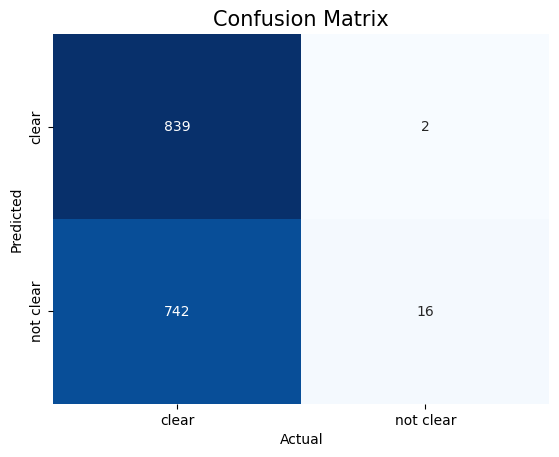

In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = y.unique()

SVM_Linear1_matrix = confusion_matrix(y_test, SVM_Model_linear1.predict(x_test))

# if only first row values are annotated then upgrade your seaborn
# pip install seaborn --upgrade
sns.heatmap(SVM_Linear1_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

In [49]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_linear1 = accuracy_score(y_test, SVM_Model_linear1.predict(x_test))
print("accuracy_linear1 =", accuracy_linear1 )

accuracy_linear1 = 0.5347091932457786


In [14]:
SVM_Model_linear2=LinearSVC(C=10)
SVM_Model_linear2.fit(x_train, y_train)

print("SVM Linear 2 prediction:\n", SVM_Model_linear2.predict(x_test))
print("Actual:")
print(y_test)

SVM Linear 2 prediction:
 ['clear' 'clear' 'clear' ... 'clear' 'clear' 'clear']
Actual:
3015    not clear
599         clear
415         clear
1708    not clear
3927        clear
          ...    
5925    not clear
7432    not clear
7499    not clear
315         clear
7677        clear
Name: weather, Length: 1599, dtype: category
Categories (2, object): ['clear', 'not clear']


/Users/yeshwanth/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


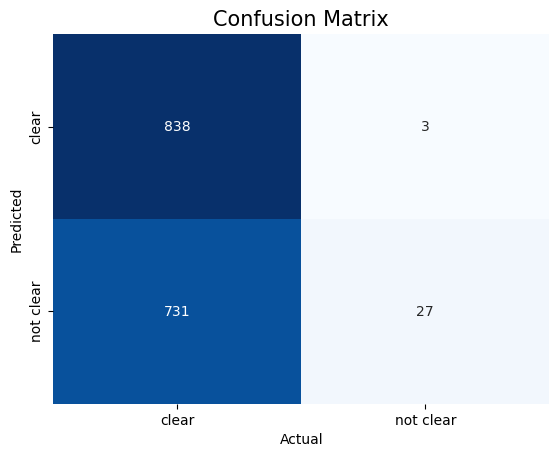

In [15]:
SVM_Linear2_matrix = confusion_matrix(y_test, SVM_Model_linear2.predict(x_test))

# if only first row values are annotated then upgrade your seaborn
# pip install seaborn --upgrade
sns.heatmap(SVM_Linear2_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

In [50]:
accuracy_linear2 = accuracy_score(y_test, SVM_Model_linear2.predict(x_test))
print("accuracy_linear2 =", accuracy_linear2 )

accuracy_linear2 = 0.5409631019387117


In [17]:
SVM_Model_linear3=LinearSVC(C=50)
SVM_Model_linear3.fit(x_train, y_train)

print("SVM Linear 3 prediction:\n", SVM_Model_linear3.predict(x_test))
print("Actual:")
print(y_test)

SVM Linear 3 prediction:
 ['clear' 'not clear' 'not clear' ... 'not clear' 'not clear' 'clear']
Actual:
3015    not clear
599         clear
415         clear
1708    not clear
3927        clear
          ...    
5925    not clear
7432    not clear
7499    not clear
315         clear
7677        clear
Name: weather, Length: 1599, dtype: category
Categories (2, object): ['clear', 'not clear']


/Users/yeshwanth/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


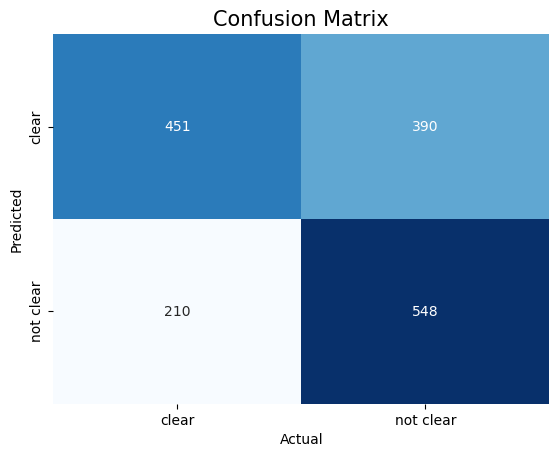

In [18]:
SVM_Linear3_matrix = confusion_matrix(y_test, SVM_Model_linear3.predict(x_test))

# if only first row values are annotated then upgrade your seaborn
# pip install seaborn --upgrade
sns.heatmap(SVM_Linear3_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

In [51]:
accuracy_linear3 = accuracy_score(y_test, SVM_Model_linear3.predict(x_test))
print("accuracy_linear3 =", accuracy_linear3 )

accuracy_linear3 = 0.624765478424015


In [20]:
import sklearn
SVM_Model_rbf1=sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma="auto")
SVM_Model_rbf1.fit(x_train, y_train)

print("SVM prediction:\n", SVM_Model_rbf1.predict(x_test))
print("Actual:")
print(y_test)

SVM prediction:
 ['clear' 'clear' 'not clear' ... 'clear' 'not clear' 'clear']
Actual:
3015    not clear
599         clear
415         clear
1708    not clear
3927        clear
          ...    
5925    not clear
7432    not clear
7499    not clear
315         clear
7677        clear
Name: weather, Length: 1599, dtype: category
Categories (2, object): ['clear', 'not clear']


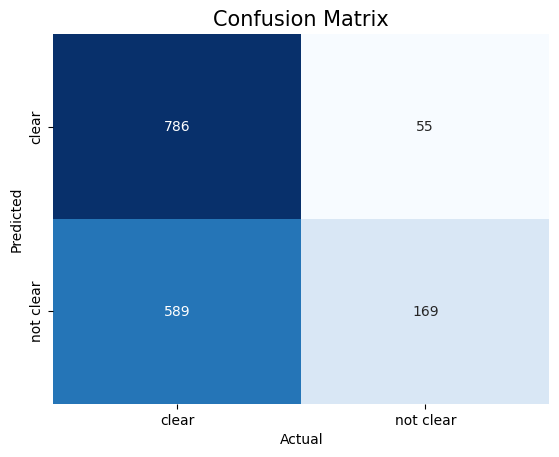

In [21]:
SVM_rbf1_matrix = confusion_matrix(y_test, SVM_Model_rbf1.predict(x_test))

# if only first row values are annotated then upgrade your seaborn
# pip install seaborn --upgrade
sns.heatmap(SVM_rbf1_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

In [52]:
accuracy_rbf1 = accuracy_score(y_test, SVM_Model_rbf1.predict(x_test))
print("accuracy_rbf1 =", accuracy_rbf1 )

accuracy_rbf1 = 0.5972482801751094


In [23]:
SVM_Model_rbf2=sklearn.svm.SVC(C=10, kernel='rbf', degree=3, gamma="auto")
SVM_Model_rbf2.fit(x_train, y_train)

print("SVM prediction:\n", SVM_Model_rbf2.predict(x_test))
print("Actual:")
print(y_test)

SVM prediction:
 ['clear' 'clear' 'not clear' ... 'not clear' 'not clear' 'clear']
Actual:
3015    not clear
599         clear
415         clear
1708    not clear
3927        clear
          ...    
5925    not clear
7432    not clear
7499    not clear
315         clear
7677        clear
Name: weather, Length: 1599, dtype: category
Categories (2, object): ['clear', 'not clear']


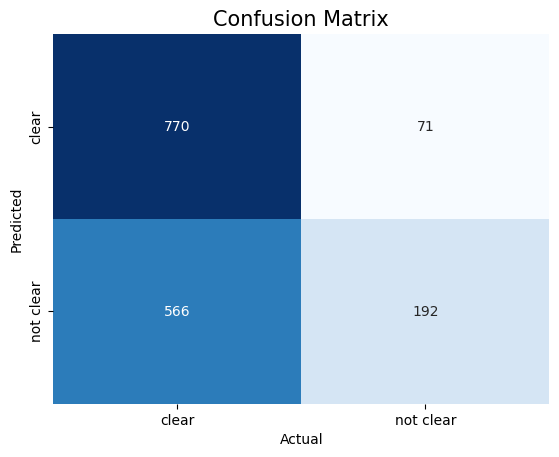

In [24]:
SVM_rbf2_matrix = confusion_matrix(y_test, SVM_Model_rbf2.predict(x_test))

# if only first row values are annotated then upgrade your seaborn
# pip install seaborn --upgrade
sns.heatmap(SVM_rbf2_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

In [53]:
accuracy_rbf2 = accuracy_score(y_test, SVM_Model_rbf2.predict(x_test))
print("accuracy_rbf2 =", accuracy_rbf2)

accuracy_rbf2 = 0.6016260162601627


In [26]:
SVM_Model_rbf3=sklearn.svm.SVC(C=50, kernel='rbf', degree=3, gamma="auto")
SVM_Model_rbf3.fit(x_train, y_train)

print("SVM prediction:\n", SVM_Model_rbf3.predict(x_test))
print("Actual:")
print(y_test)

SVM prediction:
 ['clear' 'clear' 'not clear' ... 'not clear' 'not clear' 'clear']
Actual:
3015    not clear
599         clear
415         clear
1708    not clear
3927        clear
          ...    
5925    not clear
7432    not clear
7499    not clear
315         clear
7677        clear
Name: weather, Length: 1599, dtype: category
Categories (2, object): ['clear', 'not clear']


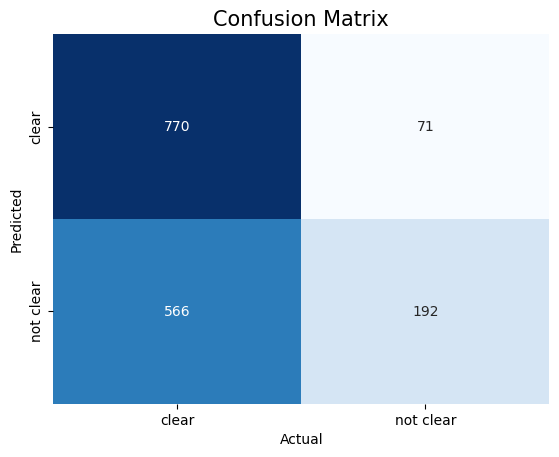

In [27]:
SVM_rbf3_matrix = confusion_matrix(y_test, SVM_Model_rbf3.predict(x_test))

# if only first row values are annotated then upgrade your seaborn
# pip install seaborn --upgrade
sns.heatmap(SVM_rbf3_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

In [54]:
accuracy_rbf3 = accuracy_score(y_test, SVM_Model_rbf3.predict(x_test))
print("accuracy_rbf3 =", accuracy_rbf3 )

accuracy_rbf3 = 0.6016260162601627


In [29]:
SVM_Model_poly1=sklearn.svm.SVC(C=0.0001, kernel='poly', degree=3, gamma="auto")
SVM_Model_poly1.fit(x_train, y_train)

print("SVM prediction:\n", SVM_Model_poly1.predict(x_test))
print("Actual:")
print(y_test)

SVM prediction:
 ['clear' 'not clear' 'clear' ... 'not clear' 'clear' 'clear']
Actual:
3015    not clear
599         clear
415         clear
1708    not clear
3927        clear
          ...    
5925    not clear
7432    not clear
7499    not clear
315         clear
7677        clear
Name: weather, Length: 1599, dtype: category
Categories (2, object): ['clear', 'not clear']


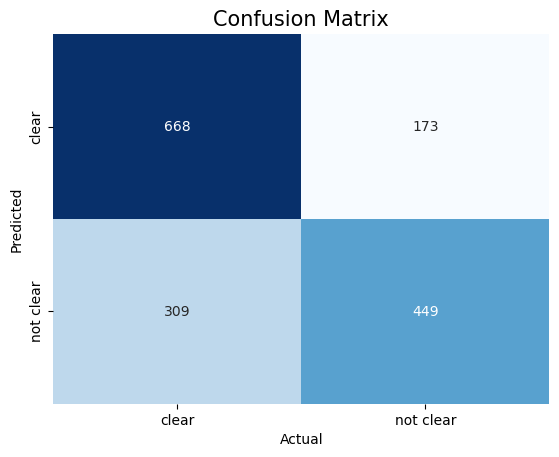

In [30]:
SVM_poly1_matrix = confusion_matrix(y_test, SVM_Model_poly1.predict(x_test))

# if only first row values are annotated then upgrade your seaborn
# pip install seaborn --upgrade
sns.heatmap(SVM_poly1_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

In [55]:
accuracy_poly1 = accuracy_score(y_test, SVM_Model_poly1.predict(x_test))
print("accuracy_poly1 =", accuracy_poly1 )

accuracy_poly1 = 0.6985616010006254


In [32]:
SVM_Model_poly2=sklearn.svm.SVC(C=0.0005, kernel='poly', degree=3, gamma="auto")
SVM_Model_poly2.fit(x_train, y_train)

print("SVM prediction:\n", SVM_Model_poly2.predict(x_test))
print("Actual:")
print(y_test)

SVM prediction:
 ['clear' 'not clear' 'clear' ... 'not clear' 'clear' 'clear']
Actual:
3015    not clear
599         clear
415         clear
1708    not clear
3927        clear
          ...    
5925    not clear
7432    not clear
7499    not clear
315         clear
7677        clear
Name: weather, Length: 1599, dtype: category
Categories (2, object): ['clear', 'not clear']


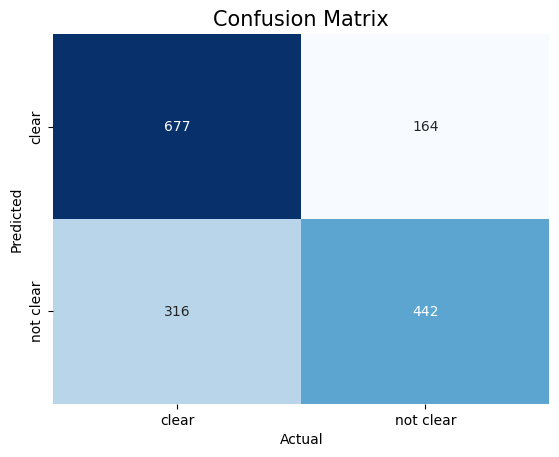

In [33]:
SVM_poly2_matrix = confusion_matrix(y_test, SVM_Model_poly2.predict(x_test))

# if only first row values are annotated then upgrade your seaborn
# pip install seaborn --upgrade
sns.heatmap(SVM_poly2_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

In [57]:
accuracy_poly2 = accuracy_score(y_test, SVM_Model_poly2.predict(x_test))
print("accuracy_poly2 =", accuracy_poly2 )

accuracy_poly2 = 0.699812382739212


In [35]:
SVM_Model_poly3=sklearn.svm.SVC(C=0.001, kernel='poly', degree=3, gamma="auto")
SVM_Model_poly3.fit(x_train, y_train)

print("SVM prediction:\n", SVM_Model_poly3.predict(x_test))
print("Actual:")
print(y_test)

SVM prediction:
 ['clear' 'not clear' 'clear' ... 'not clear' 'clear' 'clear']
Actual:
3015    not clear
599         clear
415         clear
1708    not clear
3927        clear
          ...    
5925    not clear
7432    not clear
7499    not clear
315         clear
7677        clear
Name: weather, Length: 1599, dtype: category
Categories (2, object): ['clear', 'not clear']


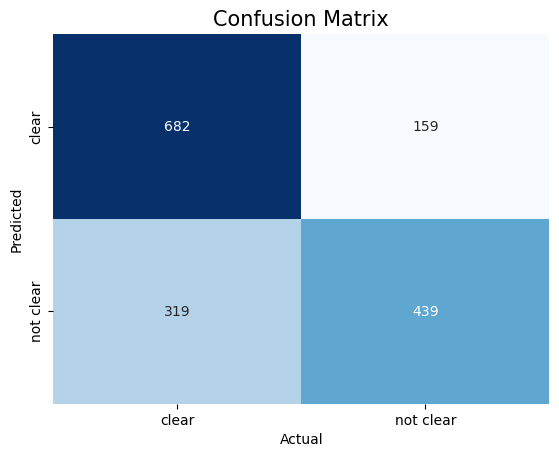

In [36]:
SVM_poly3_matrix = confusion_matrix(y_test, SVM_Model_poly3.predict(x_test))

# if only first row values are annotated then upgrade your seaborn
# pip install seaborn --upgrade
sns.heatmap(SVM_poly3_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

In [58]:
accuracy_poly3 = accuracy_score(y_test, SVM_Model_poly3.predict(x_test))
print("accuracy_poly3 =", accuracy_poly3 )

accuracy_poly3 = 0.7010631644777986


In [62]:
print("accuracy (Linear, c = 1) =", accuracy_linear1 )
print("accuracy (Linear, c = 10) =", accuracy_linear2 )
print("accuracy (Linear, c = 50) =", accuracy_linear3 )
print("accuracy (RBF, c = 1) =", accuracy_rbf1)
print("accuracy (RBF, c = 10) =", accuracy_rbf2)
print("accuracy (RBF, c = 50) =", accuracy_rbf3)
print("accuracy (Polynomial, c = 0.0001) =", accuracy_poly1)
print("accuracy (Polynomial, c = 0.0005) =", accuracy_poly2)
print("accuracy (Polynomial, c = 0.01) =", accuracy_poly3)

accuracy (Linear, c = 1) = 0.5347091932457786
accuracy (Linear, c = 10) = 0.5409631019387117
accuracy (Linear, c = 50) = 0.624765478424015
accuracy (RBF, c = 1) = 0.5972482801751094
accuracy (RBF, c = 10) = 0.6016260162601627
accuracy (RBF, c = 50) = 0.6016260162601627
accuracy (Polynomial, c = 0.0001) = 0.6985616010006254
accuracy (Polynomial, c = 0.0005) = 0.699812382739212
accuracy (Polynomial, c = 0.01) = 0.7010631644777986
